5y
5y
5y
5y
5y
5y
5y
                 UNH      AAPL       MMM        HD        GS       MCD  \
date                                                                     
2013-09-05       NaN       NaN       NaN       NaN       NaN       NaN   
2013-09-06  0.000270  0.005938  0.001479 -0.003981  0.003133  0.006252   
2013-09-09  0.006321  0.015831  0.014669  0.012031  0.017903  0.001972   
2013-09-10  0.005105 -0.023041  0.007255  0.013767  0.034812  0.004551   
2013-09-11  0.007342 -0.055982  0.009479  0.005881 -0.000484  0.005866   

                  BA  
date                  
2013-09-05       NaN  
2013-09-06 -0.005453  
2013-09-09  0.010504  
2013-09-10  0.009101  
2013-09-11  0.009752  
     Portfolio Return  Stock Volatility
0            0.195488          0.134772
1            0.194937          0.133918
2            0.219766          0.150006
3            0.184889          0.140174
4            0.215480          0.149180
5            0.199356          0.139390
6            0.2118

Text(0.5,1,'The Efficient Frontier of 7-asset portfolio')

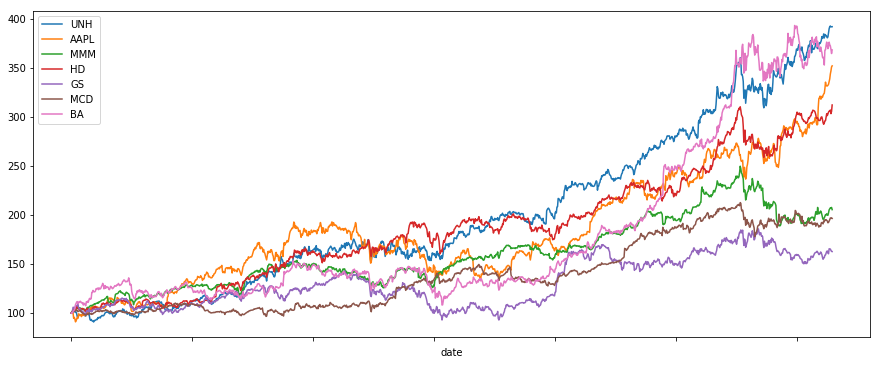

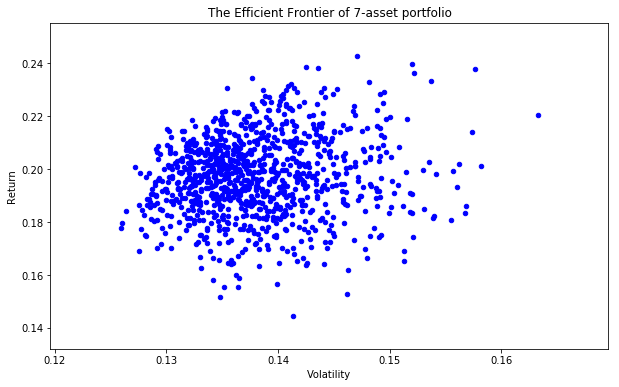

In [2]:
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
tickers= ['UNH','AAPL','MMM','HD','GS','MCD', 'BA'] #creating a array containing the stock tickers
stock_data=pd.DataFrame() # A dataframe created to store the stock data
for t in tickers: # For loop created to call all the data from the iex data provider
    stock_data[t]=wb.DataReader(t,data_source='iex',start='2013-1-1')['close']
    
(stock_data/stock_data.iloc[0]*100).plot(figsize=(15,6)) # The should to normalised in order to ensure smooth analysis
log_returns=np.log(stock_data/stock_data.shift(1)) # Calculating the log returns of each stock
print (log_returns.head())

num_tickers = len(tickers) # num_tickers stores the number of stocks in the portfolio
port_ret= [] # creating a dataframe that storres the portfolio returns  
port_vol=[]

for i in range(1000): # Monte-Carlo running 1000 simulations with differents weights
    wieghts = np.random.random(num_tickers) # randomizing the weights 
    wieghts /= np.sum(wieghts) # making sure that the total of all the weights equals one
    port_ret.append(np.sum(wieghts*log_returns.mean())*250) # calculating and storing expected returns in port_ret dataframe
    port_vol.append(np.sqrt(np.dot(wieghts.T , np.dot(log_returns.cov()*250,wieghts)))) # calculating and storing the expected volatility in port_vol dataframe
port_ret= np.array(port_ret)
port_vol= np.array(port_vol)
print (pd.DataFrame({'Portfolio Return':port_ret,'Stock Volatility':port_vol}))

portfolio = pd.DataFrame({'Return':port_ret, 'Volatility': port_vol}) # Merging the two dataframes in one 'portfolio dataframe
portfolio.plot(x='Volatility',y='Return', kind='scatter',color='Blue',figsize=(10,6))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('The Efficient Frontier of 7-asset portfolio')

In [11]:
port_vol*100

array([13.44366039, 13.38004099, 13.8678812 , 14.47277291, 12.84224518,
       13.98190664, 14.73729282, 13.67550021, 13.74664048, 13.81559733,
       13.69776223, 15.07840337, 13.52664841, 14.5092    , 13.35905029,
       14.32047472, 13.80110547, 14.61719243, 13.77481082, 14.07073418,
       14.01379076, 14.79027488, 13.70718321, 14.09386984, 13.36856612,
       14.51263352, 13.49446355, 14.11555574, 13.44096167, 14.75304524,
       13.31801243, 15.3965205 , 13.24402313, 13.47749625, 14.01366061,
       14.77449686, 13.07413992, 14.2269735 , 13.51843553, 13.72766224,
       14.42328907, 14.1272803 , 13.65039437, 13.06937114, 13.69733998,
       13.82050744, 13.93691015, 12.97218978, 13.88090727, 14.49515166,
       13.22749234, 13.94623697, 13.47400169, 13.3090487 , 13.82491494,
       13.4142214 , 12.96900919, 12.90320708, 14.37230633, 13.21612779,
       14.10337373, 13.75895922, 13.2011126 , 13.26706343, 14.65915526,
       13.66886032, 12.97727854, 13.17008053, 13.95895223, 13.81